<a href="https://colab.research.google.com/github/Salma-Abouzeid/diamonds/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('diamonds.csv')
print(df.info)
print(df.head())
print(df.describe(include='all'))
df.drop('Unnamed: 0',axis=1,inplace=True) #removing column unnamed: 0 as it's redundant
print(df)

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               1   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               2   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               3   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               4   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

# Handling null values


In [35]:
print('null count: ')
print(df.isnull().sum()) #null values found in clarity and x
df=df.dropna()
print('null count: ')
print(df.isnull().sum())

null count: 
carat         0
cut           0
color         0
clarity    1785
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
null count: 
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


# Handling for duplicates

In [36]:
print('duplicated:')
print(df.duplicated().sum())
df=df.drop_duplicates()
print('duplicated:')
print(df.duplicated().sum())

duplicated:
0
duplicated:
0


# More data inspection

In [43]:
for i in df.columns: #display all supposed values for all columns
    print(i)
    print(df[i].unique())

    #notice : In cut: 'very good' and 'ideal'
    #In color: 'e'
    #In clarity: 'IF' and '8'

df['cut']=df['cut'].replace('very good','Very Good')
df['cut']=df['cut'].replace('ideal','Ideal')
df['color']=df['color'].replace('e','E')
df['clarity']=df['clarity'].replace('IF','')
df['clarity']=df['clarity'].replace('8','')
print('************************')
for i in df.columns: #display all supposed values for all columns
    print(i)
    print(df[i].unique())

carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.87 1.   0.57 0.82 1.04 0.93 1.2  0.99
 0.34 0.43 0.36 0.55 0.95 0.89 1.02 0.97 0.85 0.92 1.27 0.66 1.12 0.68
 1.03 0.62 1.22 0.56 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.41 1.13
 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11 1.1
 1.18 1.15 1.25 1.07 0.27 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 1.

# Encode categorical data
categorical data: cut(ordinal),color(nominal),clarity(ordinal)

to search:
ordinal>>>label encoding,, nominal>>one-hot encoding (get_dummies)

correction: sorry I was wrong
color turned out to be ordinal data as colour affects the value of the diamond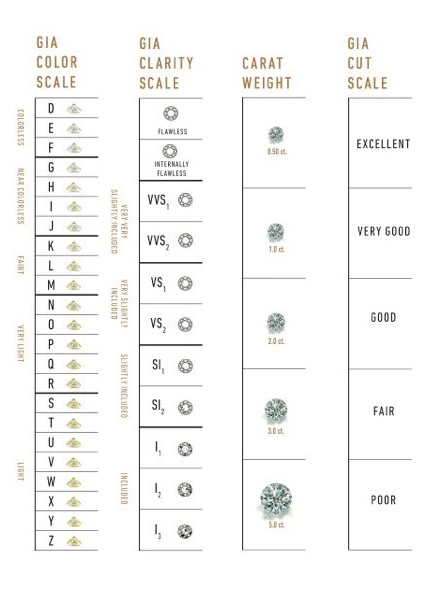

In [12]:
def func1(x): #for cut column
    if x=='Ideal':
        return 1
    if x=='Premium':
        return 2
    if x=='Very Good':
        return 3
    if x=='Good':
        return 4
    else:
        return 5
df['cut encoded']=df['cut'].apply(func1)
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cut encoded  
0            1  
1            2  
2            4  
3            2  
4            4  


In [48]:
#Another more correct solution
df['cut encoded']=df['cut'].map({'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5})
df['color encoded']=df['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity encoded']=df['clarity'].map({'I1':8,'SI2':7,'SI1':6,'VS2':5,'VS1':4,'VVS2':3,'VVS1':2,'IF':1})
print(df.head(10))

   carat        cut color clarity  depth  table  price     x     y     z  \
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47   
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53   
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49   
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39   

   cut encoded  color encoded  clarity encoded  
0          1.0              2                7  
1          2.0              2                6  
2          4.0  

# DATA VISUALISATION

<Axes: xlabel='cut encoded', ylabel='count'>

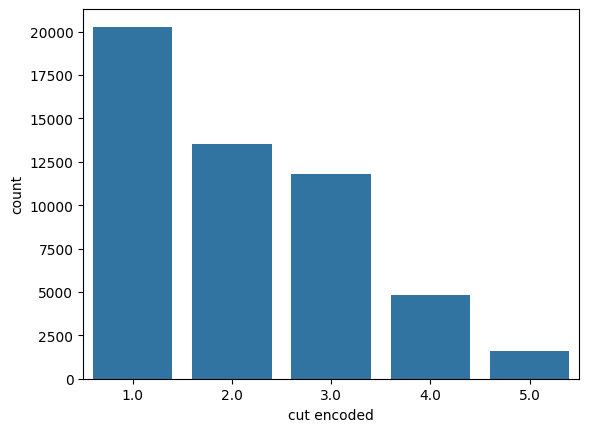

In [72]:
sns.countplot(x='cut encoded',data=df) #data skewed at the beginning at ideal (right skewed)

<Axes: xlabel='cut encoded', ylabel='Count'>

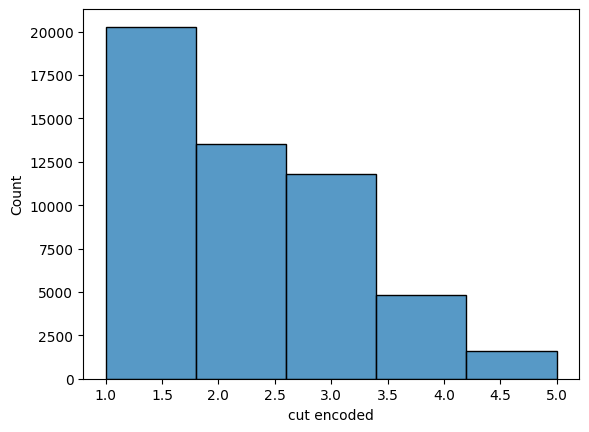

In [74]:
sns.histplot(x='cut encoded',bins=5,data=df)

<Axes: xlabel='cut', ylabel='price'>

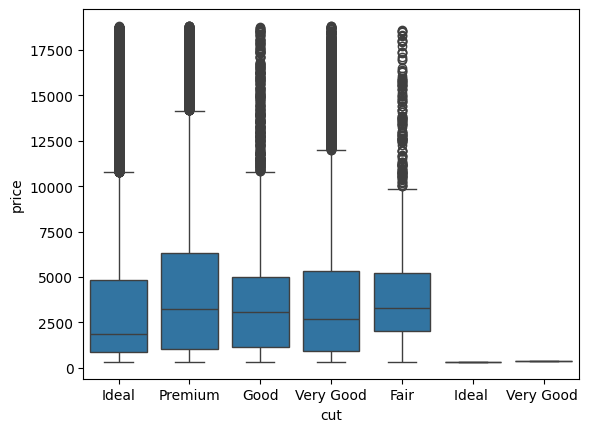

In [50]:
sns.boxplot(x='cut',y='price',data=df) #way too many outliers for price

1.6029445596893792


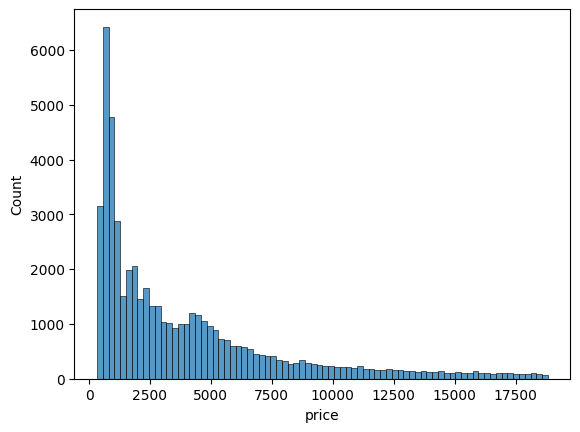

In [86]:
sns.histplot(x='price',data=df) #data right skewed, alot of cheaper diamonds than the expensive ones
print(df['price'].skew()) #skewness indicator

-0.10902588877492068


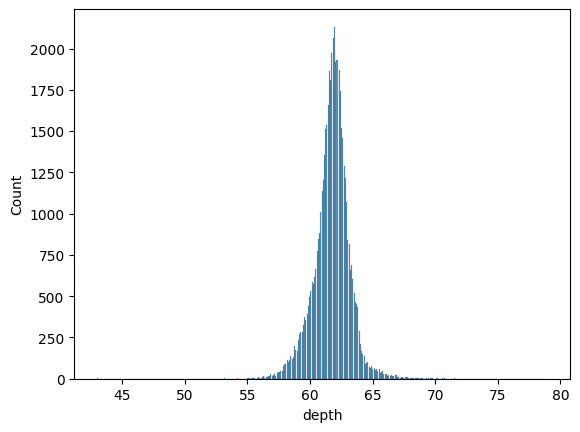

In [90]:
sns.histplot(x='depth',data=df)
print(df['depth'].skew()) #slightly left skewed

<Axes: xlabel='carat', ylabel='price'>

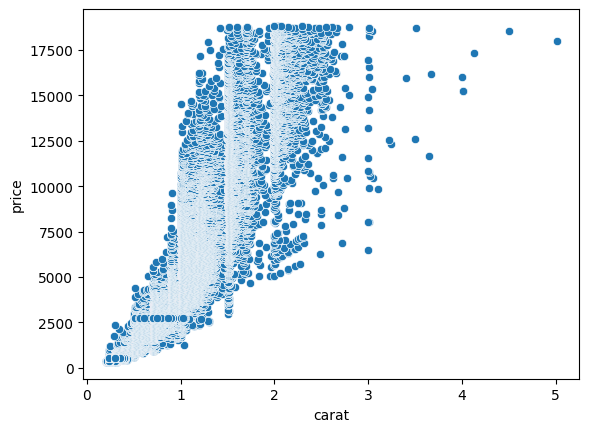

In [56]:
sns.scatterplot(x='carat',y='price',data=df) #high correlation

<Axes: >

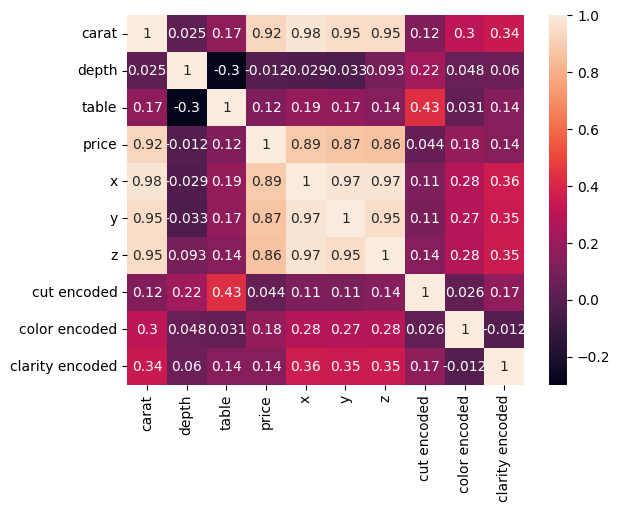

In [54]:
numerical=df.select_dtypes(include=['int64','float64'])
sns.heatmap(numerical.corr(),annot=True)
#price and carat, color,cut and clarity encoded is directly proportional, as when the degree of these features increases, the price increases

# Scaling the numeric skewed data

<Axes: xlabel='price_scaled', ylabel='Count'>

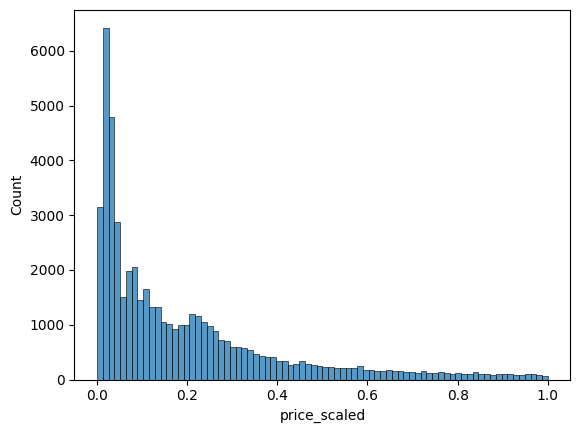

In [89]:
#normalisation of data using minmaxscaler as the price is bounded
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])
sns.histplot(x='price_scaled',data=df)

0.08096394630181157


<Axes: xlabel='price_logged', ylabel='Count'>

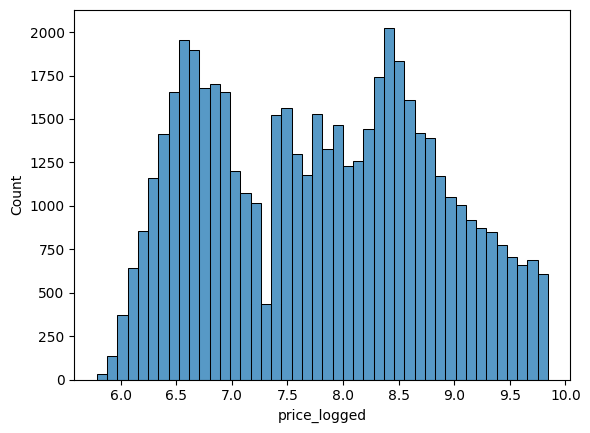

In [85]:
#log transform
df['price_logged']=np.log(df['price'])
print(df['price_logged'].skew()) #not so skew as before
sns.histplot(x='price_logged',data=df)
#the middle part???? is it due to outliers???

 needs further search
